# AAL3 for PPMI patients, case study B

All the imports and installs we'll need.


In [1]:
import os
#import torch
#from torch import nn
import numpy as np
import matplotlib.pyplot as plt
#from tqdm import tqdm

from nilearn import datasets
from nilearn import plotting
from nilearn.input_data import NiftiMapsMasker
from nilearn.connectome import ConnectivityMeasure

#import torch.nn.functional as F
#from torch.nn import Sequential, Linear, ReLU, GRU, BatchNorm1d
#from torch_geometric.nn import EdgeConv, GCNConv, GraphConv
#from torch_geometric.nn import global_mean_pool
#from torch_geometric.data import InMemoryDataset, Data, DataLoader
#from torch_geometric.utils import from_networkx

import numpy as np
import matplotlib.pyplot as plt
#from tqdm import tqdm

from nilearn import datasets
from nilearn import plotting
from nilearn.input_data import NiftiMapsMasker
from nilearn.connectome import ConnectivityMeasure

#import torch.nn.functional as F
#from torch.nn import Sequential, Linear, ReLU, GRU, BatchNorm1d
#from torch_geometric.nn import EdgeConv, GCNConv, GraphConv
#from torch_geometric.nn import global_mean_pool
#from torch_geometric.data import InMemoryDataset, Data, DataLoader
#from torch_geometric.utils import from_networkx

#import networkx as nx
#from networkx.convert_matrix import from_numpy_matrix

In [31]:
# test with AAL3 atlas

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from nilearn import datasets, plotting, input_data
import nibabel as nib

# Path to your downloaded AAL3 atlas NIfTI file
aal3_atlas_filename = '/Users/mariamannone/Downloads/AAL3/AAL3v1.nii.gz'

# Path to your downloaded AAL3 labels file (e.g., CSV or TXT)
aal3_labels_filename = '/Users/mariamannone/Downloads/AAL3/AAL3v1.nii.txt'

# Load the labels
with open(aal3_labels_filename, 'r') as f:
    roi_names = [line.strip() for line in f]
    roi_labels = [line.strip() for line in f]

# Create a masker using NiftiLabelsMasker

# Just for demonstration, let's plot the atlas regions
#atlas_img = nib.load(aal3_atlas_filename)

# Plot the AAL3 atlas
#plotting.plot_roi(atlas_img, title='AAL3 Atlas')

#plt.show()


In [3]:
import os
import numpy as np
import nibabel as nib
from nilearn import datasets, input_data, connectome
import matplotlib.pyplot as plt
import dicom2nifti
import dicom2nifti.settings as settings
import pydicom

In [5]:


# Define the directory containing DICOM files
dicom_folder = "/Users/mariamannone/Downloads/time_points_PPMI/100006/rsfMRI_RL/2020-12-16_13_26_04.0/I1526375"

# Define the output folder for NIfTI files
output_folder = "/Users/mariamannone/Desktop/new_phd_/DICOM_aal3_p3"

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Convert DICOM to NIfTI using dicom2nifti
dicom_files = [os.path.join(dicom_folder, file) for file in os.listdir(dicom_folder) if file.endswith(".dcm")]

# Load the DICOM data
dicom_data = [pydicom.dcmread(file) for file in dicom_files]

# Convert DICOM to NIfTI
nifti_file = os.path.join(output_folder, "output.nii.gz")
dicom2nifti.convert_directory(dicom_folder, nifti_file, compression=True, reorient=True)


/Users/mariamannone/test2/lib/python3.10/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '2.16.124.113543.6006.99.07901766601045931267'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


In [4]:

# Define the path to the NIfTI file
nifti_file = "/Users/mariamannone/Desktop/new_phd_/DICOM_aal3_p3/output.nii.gz/5_rsfmri_rl.nii.gz"


masker = input_data.NiftiLabelsMasker(labels_img=aal3_atlas_filename, standardize=True, memory='nilearn_cache')
time_series = masker.fit_transform(nifti_file)

# Load and standardize time series using the masker
time_series = masker.fit_transform(nifti_file)

# Compute the connectivity matrix (correlation)
correlation_measure = connectome.ConnectivityMeasure(kind='correlation')
correlation_matrices = correlation_measure.fit_transform([time_series])

# Extract the connectivity matrix
connectivity_matrix = correlation_matrices[0]



/Users/mariamannone/test2/lib/python3.10/site-packages/nilearn/maskers/nifti_labels_masker.py:805: UserWarning: After resampling the label image to the data image, the following labels were removed: {168, 134, 167}. Label image only contains 164 labels (including background).
  warnings.warn(


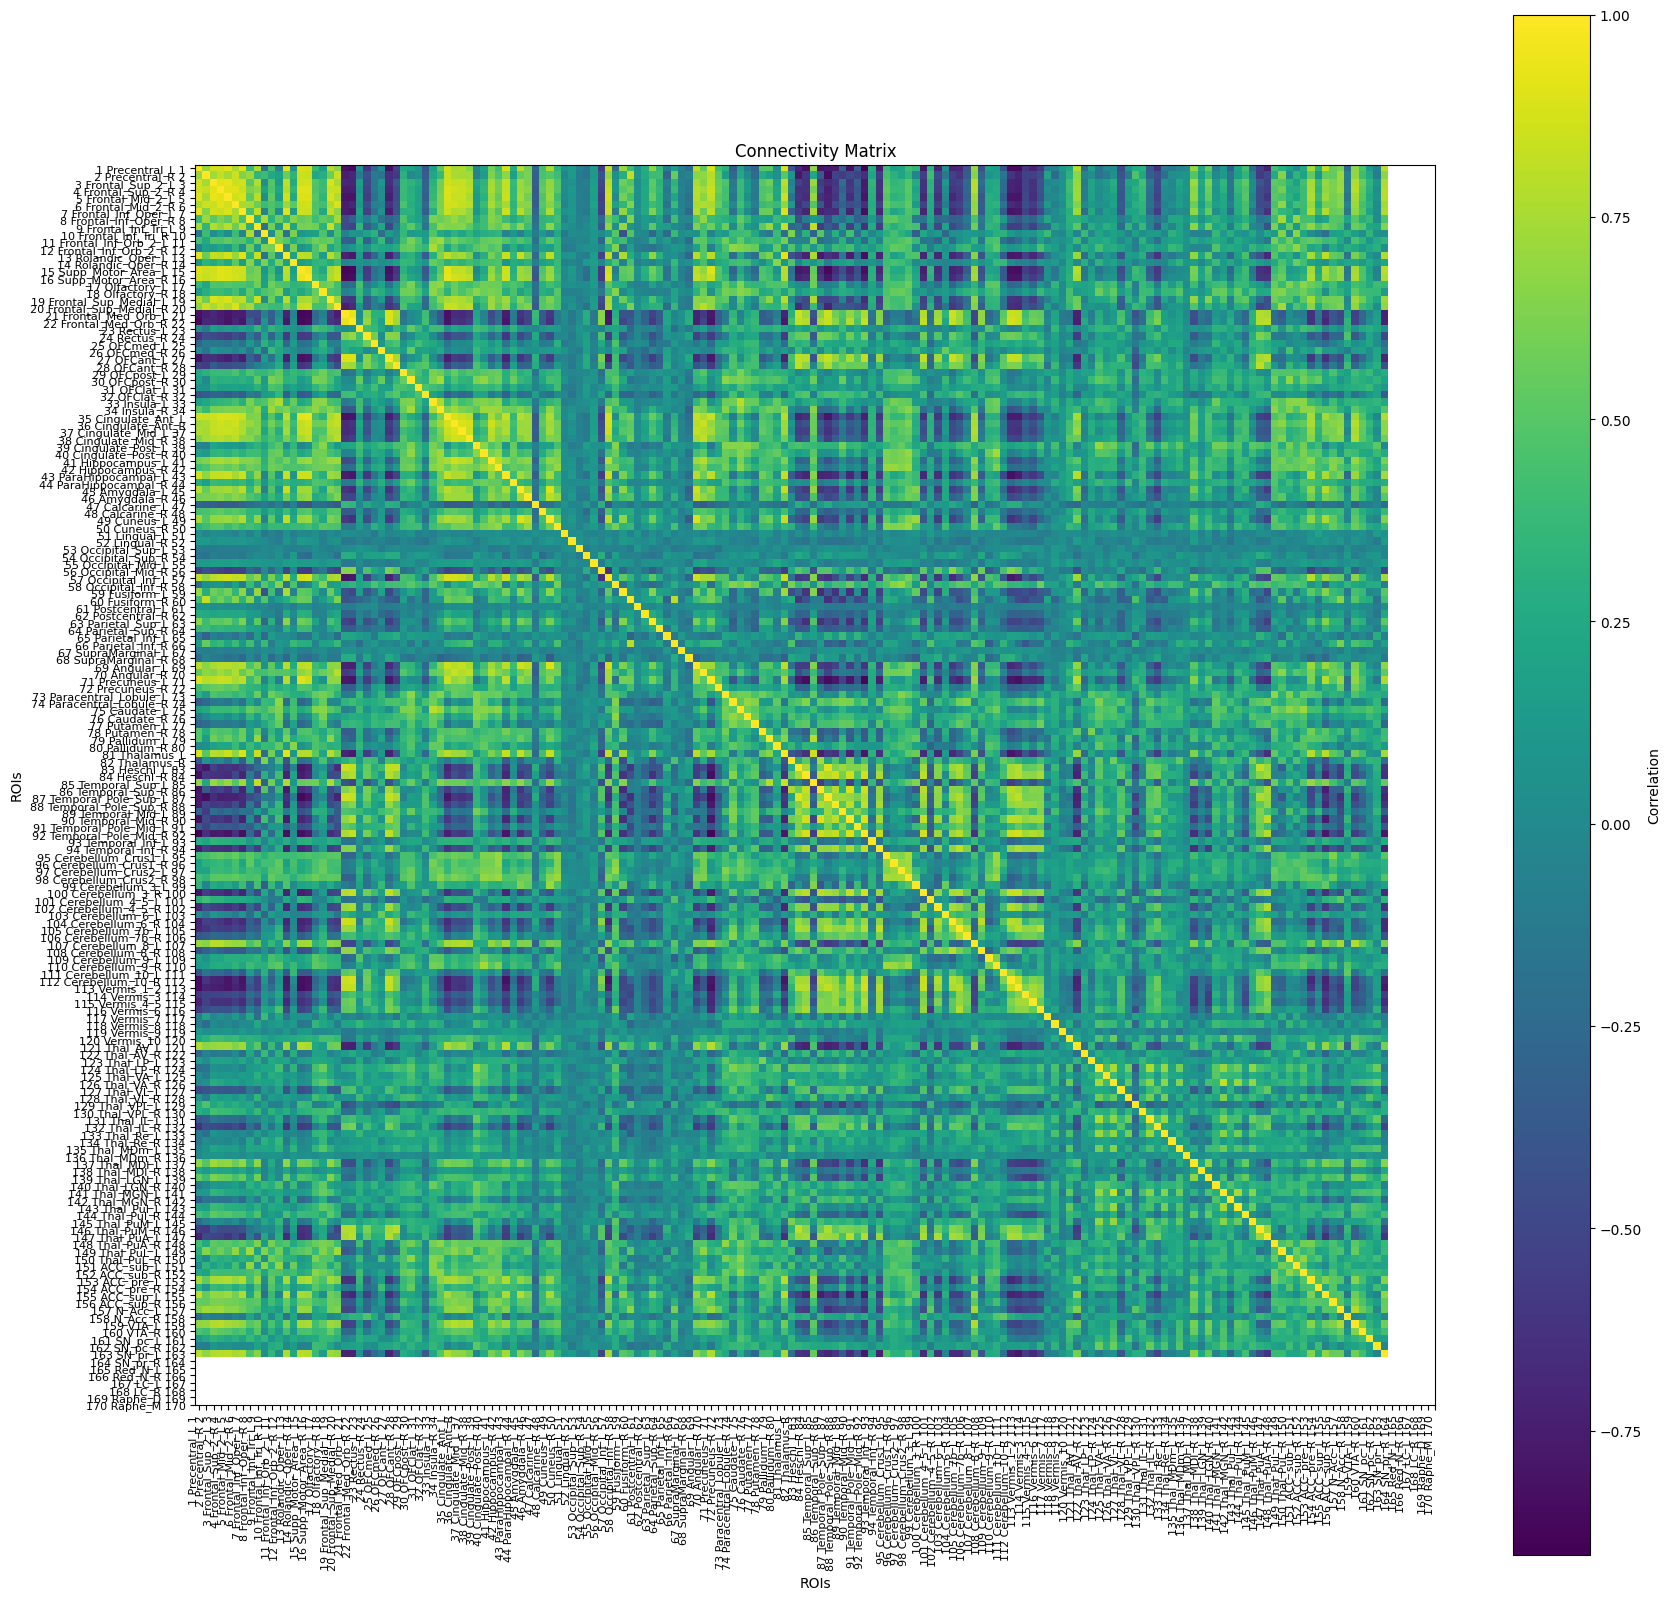

In [5]:

# Adjust the figure size to fit all labels
plt.figure(figsize=(20, 20))


plt.imshow(connectivity_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.title('Connectivity Matrix')

plt.xticks(ticks=np.arange(len(roi_names)), labels=roi_names, rotation=90, ha='right', fontsize=8)
plt.yticks(ticks=np.arange(len(roi_names)), labels=roi_names, fontsize=8)

plt.xlabel('ROIs')
plt.ylabel('ROIs')
plt.show()


In [6]:
# Identify non-empty ROIs (ROIs with non-zero time series)
non_empty_rois = np.any(time_series, axis=0)
non_empty_indices = np.where(non_empty_rois)[0]

# Identify all ROIs from the atlas
all_rois = np.arange(len(roi_names))

# Determine missing ROIs
missing_rois = np.setdiff1d(all_rois, non_empty_indices)

# Print the missing ROIs
print("Missing ROIs indices:", missing_rois)
print("Missing ROIs names:", [roi_names[i] for i in missing_rois])

Missing ROIs indices: [163 164 165 166 167 168 169]
Missing ROIs names: ['164 SN_pr_R 164', '165 Red_N_L 165', '166 Red_N_R 166', '167 LC_L 167', '168 LC_R 168', '169 Raphe_D 169', '170 Raphe_M 170']


In [12]:
female_PD_BL = connectivity_matrix

%store female_PD_BL

np.savez('male_BL.npz', data = female_PD_BL)

Stored 'female_PD_BL' (ndarray)


In [8]:
dicom_folder = "/Users/mariamannone/Downloads/time_points_PPMI/100006/rsfMRI_RL/2021-12-15_15_16_17.0/I1530145/"

output_folder = "/Users/mariamannone/Desktop/new_phd_/DICOM_aal3_p4"


# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Convert DICOM to NIfTI using dicom2nifti
dicom_files = [os.path.join(dicom_folder, file) for file in os.listdir(dicom_folder) if file.endswith(".dcm")]

# Load the DICOM data
dicom_data = [pydicom.dcmread(file) for file in dicom_files]


# Convert DICOM to NIfTI
nifti_file_fu = os.path.join(output_folder, "output.nii.gz")
dicom2nifti.convert_directory(dicom_folder, nifti_file_fu, compression=True, reorient=True)



In [13]:

# Define the path to the NIfTI file
nifti_file_fu = "/Users/mariamannone/Desktop/new_phd_/DICOM_aal3_p4/output.nii.gz/5_rsfmri_rl.nii.gz"

#fmri_img_fu = nib.load(nifti_file_fu)

masker = input_data.NiftiLabelsMasker(labels_img=aal3_atlas_filename, standardize=True, memory='nilearn_cache')
time_series = masker.fit_transform(nifti_file)

# Load and standardize time series using the masker
time_series_fu = masker.fit_transform(nifti_file_fu)

# Compute the connectivity matrix (correlation)
correlation_measure_fu = connectome.ConnectivityMeasure(kind='correlation')
correlation_matrices_fu = correlation_measure_fu.fit_transform([time_series_fu])

# Extract the connectivity matrix
connectivity_matrix_fu = correlation_matrices_fu[0]

female_PD_FU = connectivity_matrix_fu

/Users/mariamannone/test2/lib/python3.10/site-packages/nilearn/maskers/nifti_labels_masker.py:805: UserWarning: After resampling the label image to the data image, the following labels were removed: {168, 134, 167}. Label image only contains 164 labels (including background).
  warnings.warn(
/Users/mariamannone/test2/lib/python3.10/site-packages/nilearn/maskers/nifti_labels_masker.py:805: UserWarning: After resampling the label image to the data image, the following labels were removed: {64, 133, 73, 74, 63}. Label image only contains 161 labels (including background).
  warnings.warn(


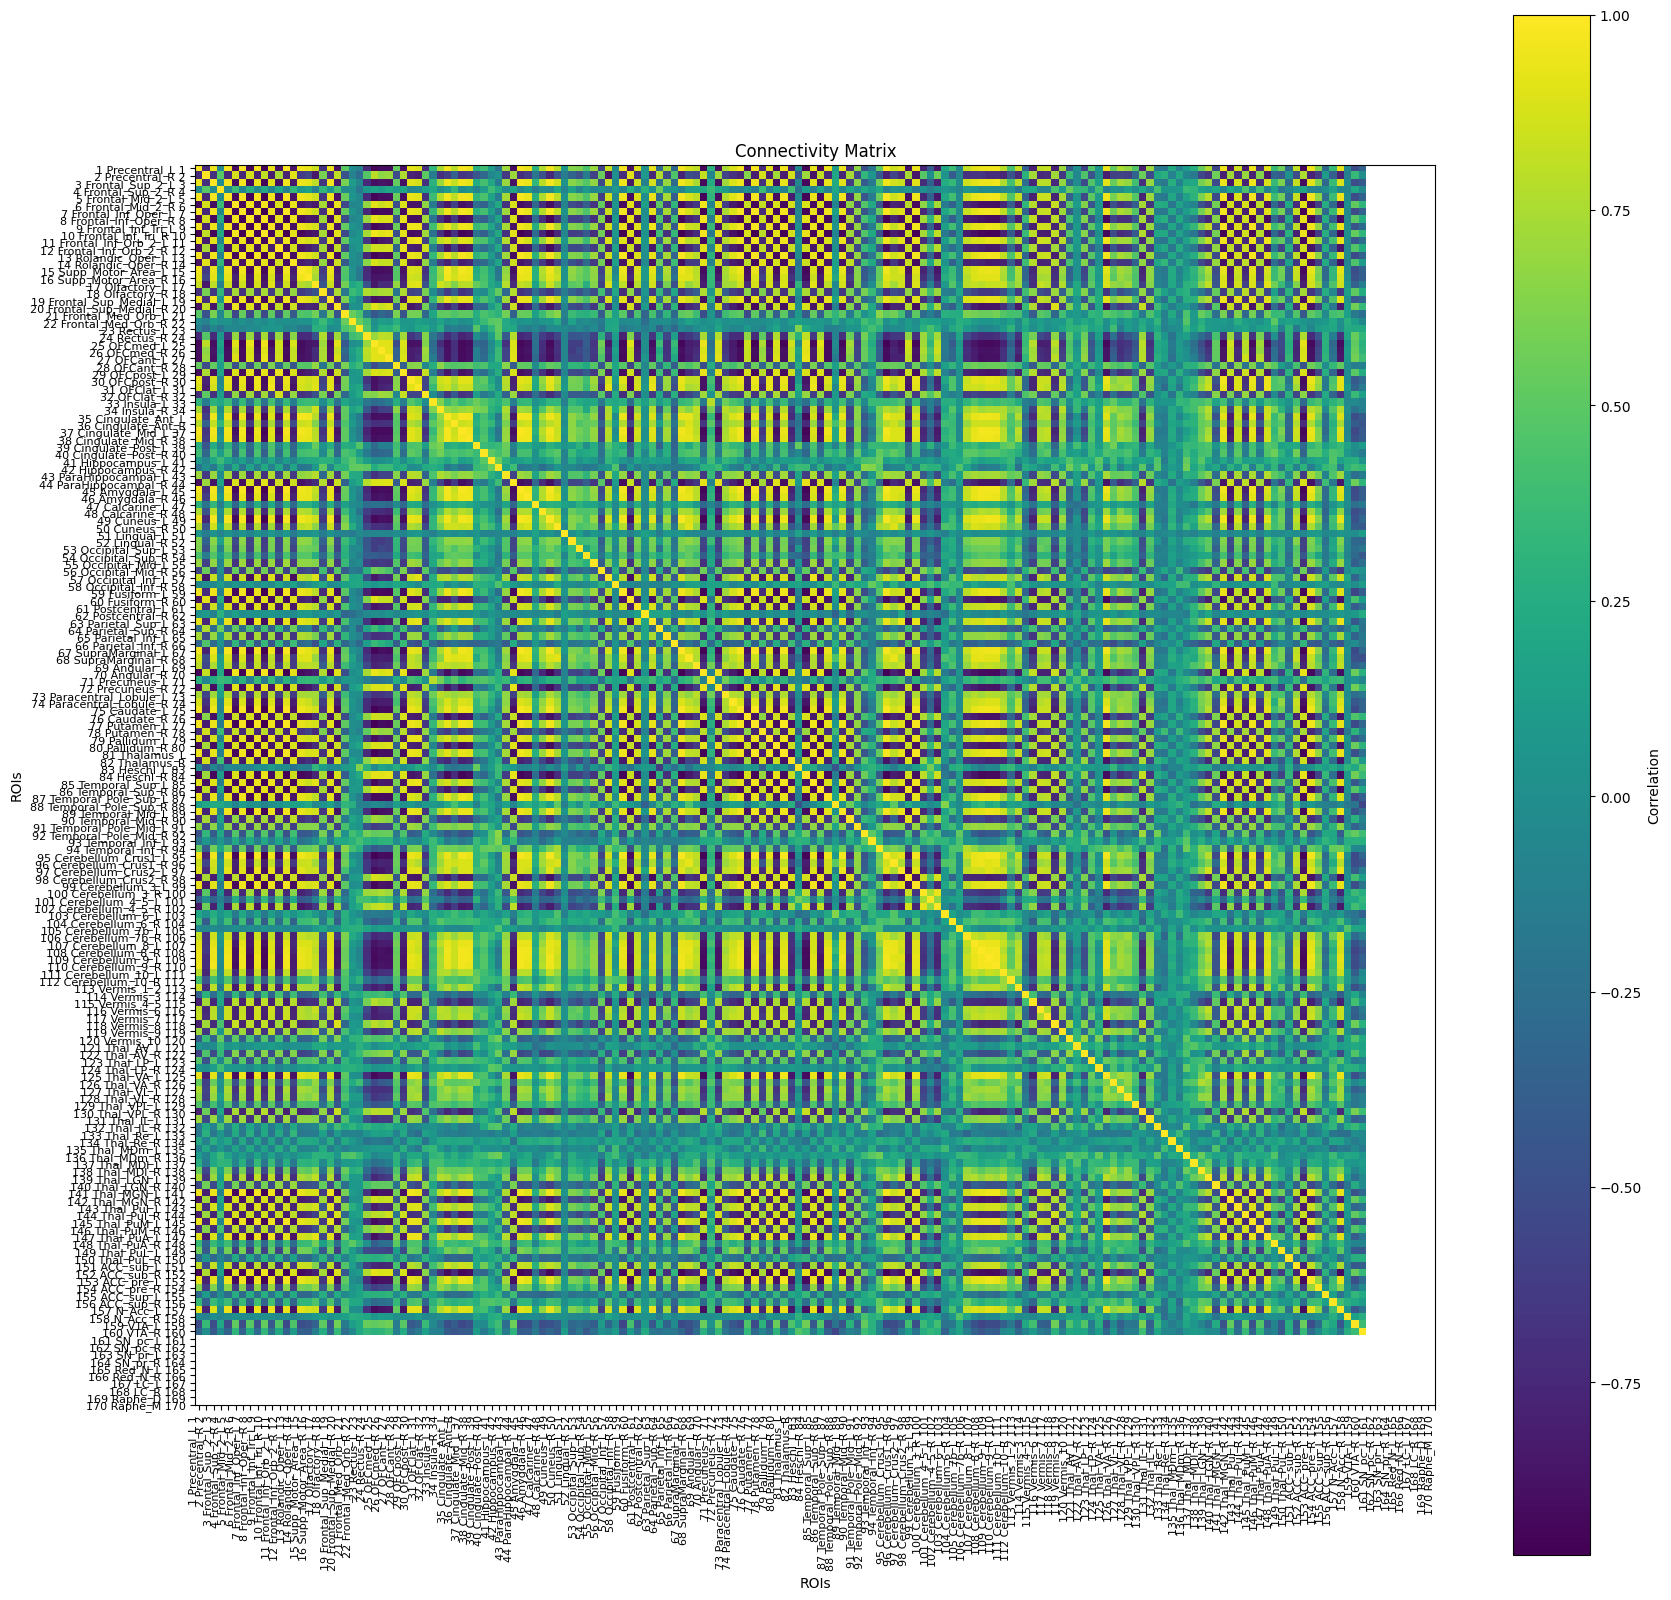

In [14]:
# Plot the connectivity matrix

# Adjust the figure size to fit all labels
plt.figure(figsize=(20, 20))


plt.imshow(connectivity_matrix_fu, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.title('Connectivity Matrix')

plt.xticks(ticks=np.arange(len(roi_names)), labels=roi_names, rotation=90, ha='right', fontsize=8)
plt.yticks(ticks=np.arange(len(roi_names)), labels=roi_names, fontsize=8)

plt.xlabel('ROIs')
plt.ylabel('ROIs')
plt.show()


In [15]:
female_PD_FU = connectivity_matrix_fu

%store female_PD_FU

np.savez('male_FU.npz', data = female_PD_FU)

Stored 'female_PD_FU' (ndarray)


In [16]:
size1 =female_PD_BL.size
size2 = female_PD_FU.size
print(size1, size2)

26569 25600


In [17]:
print("Time series length for first dataset:", len(time_series))
print("Time series length for second dataset:", len(time_series_fu))

Time series length for first dataset: 240
Time series length for second dataset: 240


In [18]:
print("Number of ROIs for first dataset:", time_series.shape[1])
print("Number of ROIs for second dataset:", time_series_fu.shape[1])


Number of ROIs for first dataset: 163
Number of ROIs for second dataset: 160


In [19]:
from nilearn import datasets
import numpy as np

# Fetch the AAL atlas to get the full list of ROI indices and labels
#aal_atlas = datasets.fetch_atlas_aal()
#roi_labels = aal_atlas.labels  # Names of all ROIs in the AAL atlas
#total_rois = list(range(len(roi_labels)))  # Indices of all ROIs in the AAL atlas

# Assume 'time_series' is your data from the first dataset
# and 'time_series_fu' is your data from the second dataset
# (you might need to adjust the names according to your actual data)

# Extract the ROI indices from the time series data
roi_indices_first = list(range(time_series.shape[1]))
roi_indices_second = list(range(time_series_fu.shape[1]))

# Find the missing ROIs in the first dataset
missing_in_first = set(roi_indices_second) - set(roi_indices_first)

# Print the ROI lists for each dataset
print("ROI indices in the first dataset:", roi_indices_first)
print("ROI indices in the second dataset:", roi_indices_second)

# Print the missing ROI indices and corresponding names
print("Missing ROI indices in the first dataset:", sorted(list(missing_in_first)))

missing_roi_labels = [roi_labels[i] for i in sorted(missing_in_first)]
print("Missing ROI labels in the first dataset:", missing_roi_labels)


ROI indices in the first dataset: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162]
ROI indices in the second dataset: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58

In [20]:
# Remove these missing ROIs from the second dataset, and perform the computation of K

In [21]:
# Identify non-empty ROIs (ROIs with non-zero time series)
non_empty_rois = np.any(time_series, axis=0)
non_empty_indices = np.where(non_empty_rois)[0]

# Identify all ROIs from the atlas
all_rois = np.arange(len(roi_names))

# Determine missing ROIs
missing_rois = np.setdiff1d(all_rois, non_empty_indices)

# Print the missing ROIs
print("Missing ROIs indices:", missing_rois)
print("Missing ROIs names:", [roi_names[i] for i in missing_rois])

Missing ROIs indices: [163 164 165 166 167 168 169]
Missing ROIs names: ['164 SN_pr_R 164', '165 Red_N_L 165', '166 Red_N_R 166', '167 LC_L 167', '168 LC_R 168', '169 Raphe_D 169', '170 Raphe_M 170']


/Users/mariamannone/test2/lib/python3.10/site-packages/nilearn/maskers/nifti_labels_masker.py:805: UserWarning: After resampling the label image to the data image, the following labels were removed: {168, 134, 167}. Label image only contains 164 labels (including background).
  warnings.warn(


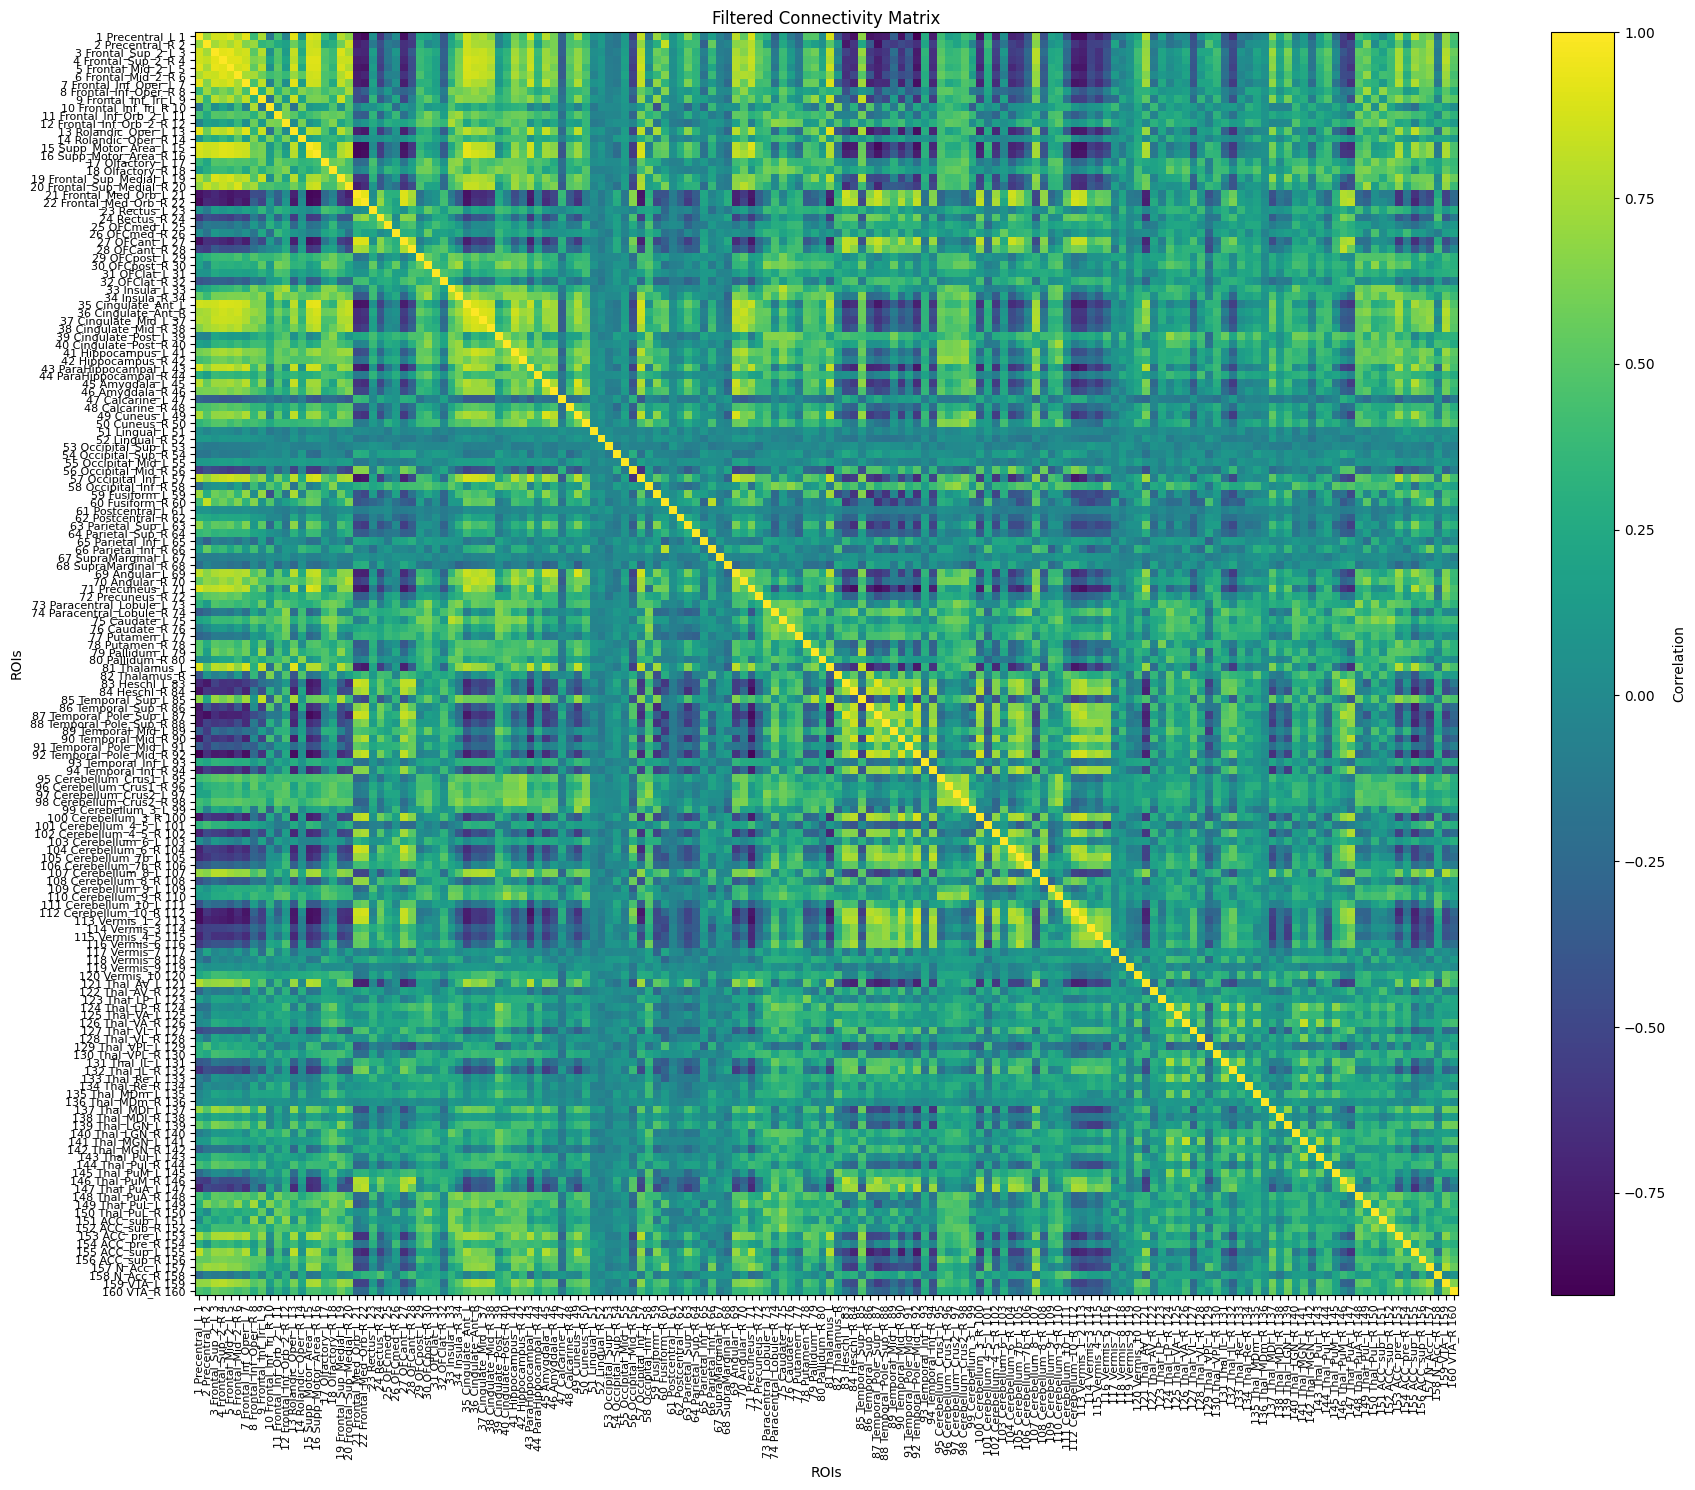

In [22]:
from nilearn import datasets, input_data, connectome
import numpy as np
import matplotlib.pyplot as plt

# Define the path to the NIfTI file
nifti_file = "/Users/mariamannone/Desktop/new_phd_/DICOM_aal3_p3/output.nii.gz/5_rsfmri_rl.nii.gz"



# List of ROIs to filter out
rois_to_filter_out = [163, 164, 165, 166, 167, 168, 169]

# Create a masker using NiftiLabelsMasker
masker = input_data.NiftiLabelsMasker(labels_img=aal3_atlas_filename, standardize=True, memory='nilearn_cache')

# Extract time series from the fMRI image using the atlas
time_series = masker.fit_transform(nifti_file)

# Identify non-empty ROIs (ROIs with non-zero time series)
non_empty_rois = np.any(time_series_fu, axis=0)
non_empty_indices = np.where(non_empty_rois)[0]

# Filter out the specified ROIs
filtered_indices = [i for i in non_empty_indices if i not in rois_to_filter_out]

# Filter the time series to include only the selected ROIs
filtered_time_series = time_series[:, filtered_indices]

# Compute the connectivity matrix
correlation_measure = connectome.ConnectivityMeasure(kind='correlation')
connectivity_matrix = correlation_measure.fit_transform([filtered_time_series])[0]

# Visualize the filtered connectivity matrix
plt.figure(figsize=(20, 15))
plt.imshow(connectivity_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.title('Filtered Connectivity Matrix')
plt.xlabel('ROIs')
plt.ylabel('ROIs')
plt.xticks(ticks=np.arange(len(filtered_indices)), labels=[roi_names[i] for i in filtered_indices], rotation=90, fontsize=8)
plt.yticks(ticks=np.arange(len(filtered_indices)), labels=[roi_names[i] for i in filtered_indices], fontsize=8)
plt.tight_layout()
plt.show()

# Save the filtered connectivity matrix to a file
np.save('filtered_connectivity_matrix.npy', connectivity_matrix)

female_PD_BL = connectivity_matrix


In [17]:
#connectivity_matrix_filtered_FU.size

/Users/mariamannone/test2/lib/python3.10/site-packages/nilearn/maskers/nifti_labels_masker.py:805: UserWarning: After resampling the label image to the data image, the following labels were removed: {64, 133, 134, 73, 74, 63}. Label image only contains 161 labels (including background).
  warnings.warn(


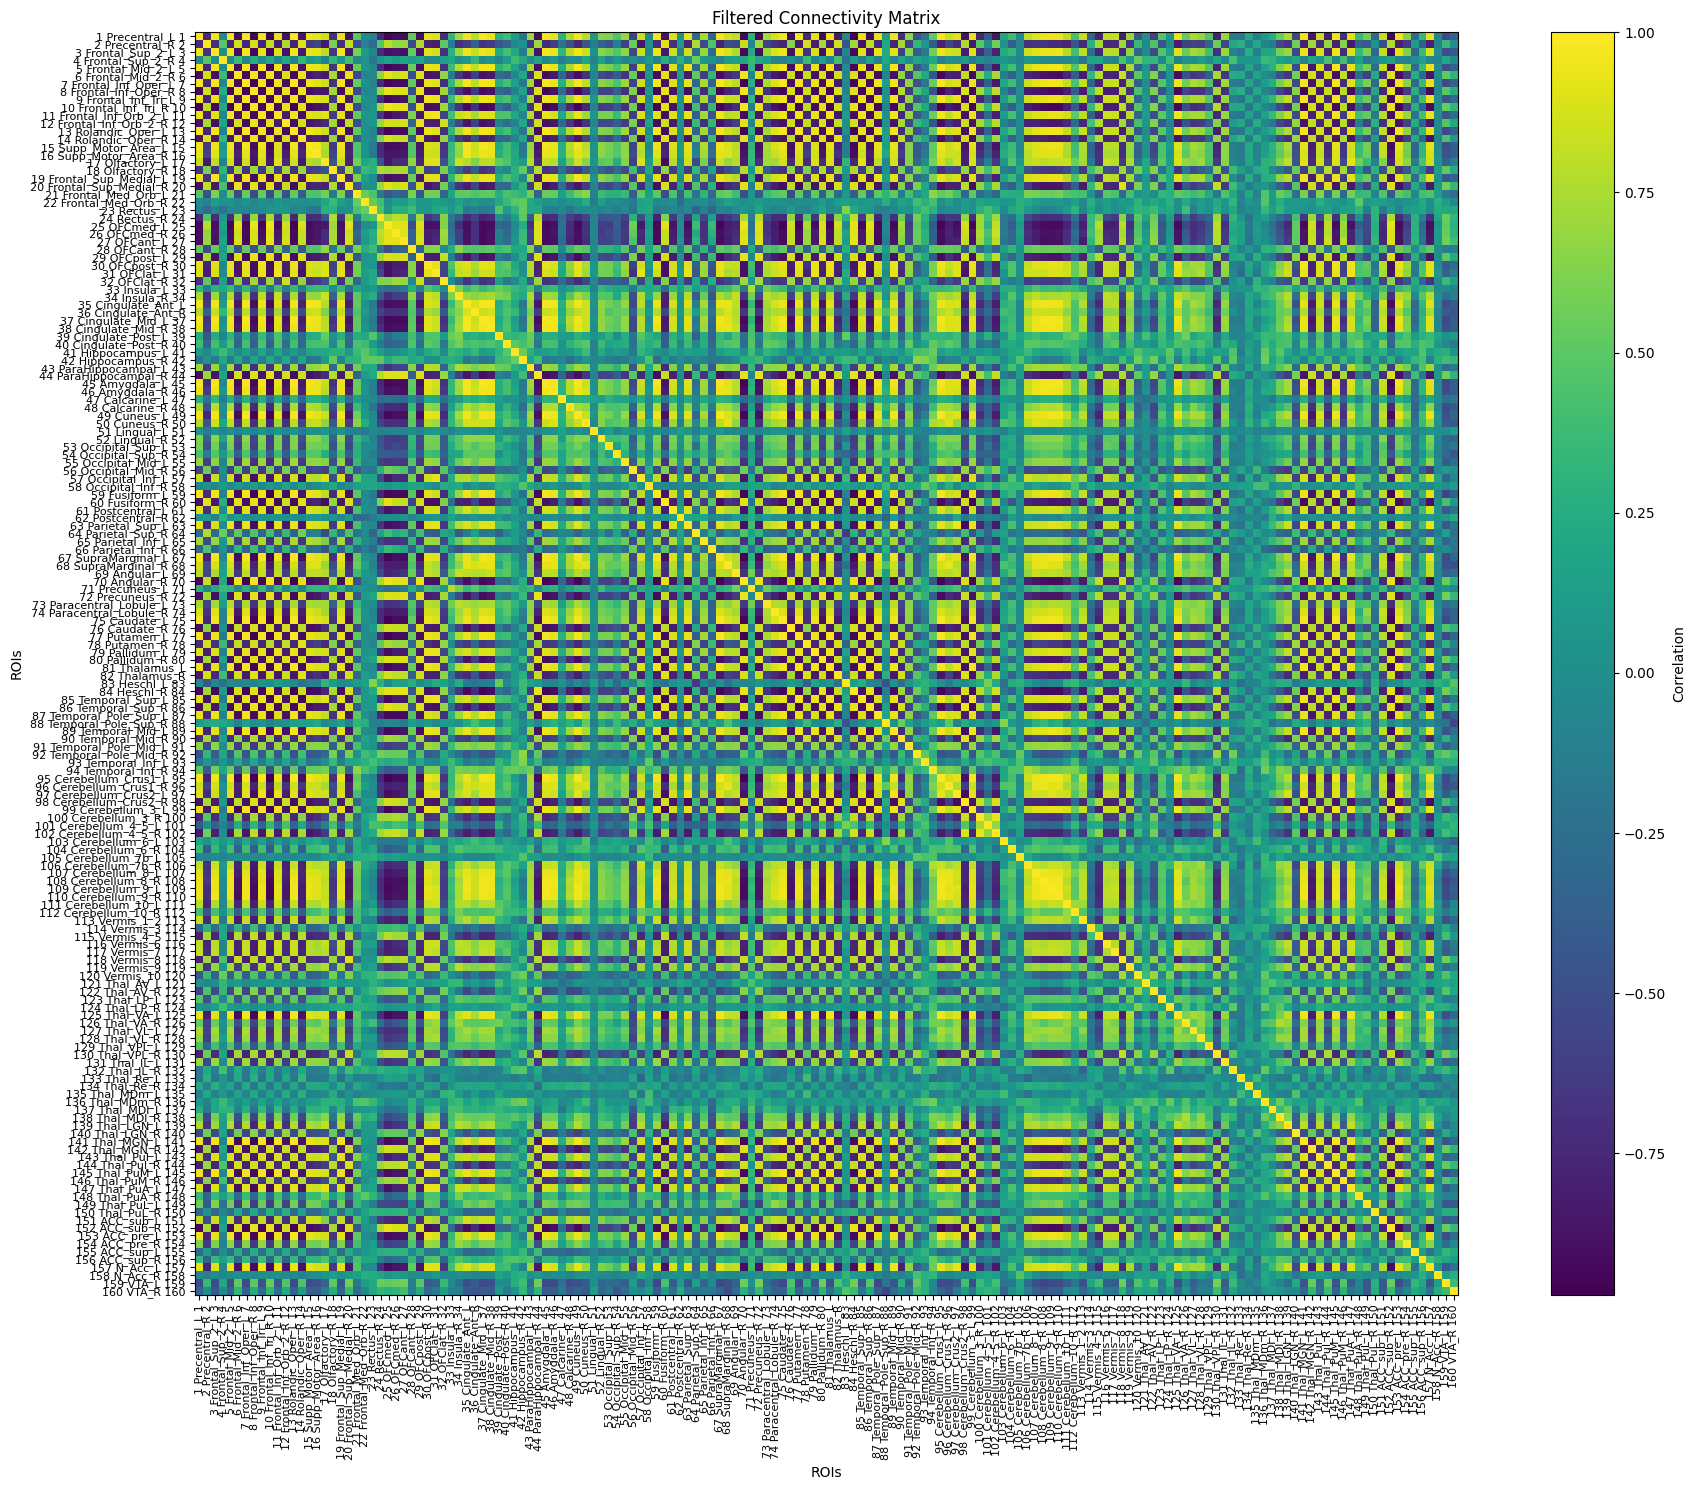

In [23]:


from nilearn import datasets, input_data, connectome
import numpy as np
import matplotlib.pyplot as plt

# Define the path to the NIfTI file
nifti_file_fu = "/Users/mariamannone/Desktop/new_phd_/DICOM_aal3_p4/output.nii.gz/5_rsfmri_rl.nii.gz"


# List of ROIs to filter out
rois_to_filter_out = [162, 163, 164, 165, 166, 167, 168, 169]

# Create a masker using NiftiLabelsMasker
masker = input_data.NiftiLabelsMasker(labels_img=aal3_atlas_filename, standardize=True, memory='nilearn_cache')

# Extract time series from the fMRI image using the atlas
time_series_fu = masker.fit_transform(nifti_file_fu)

# Identify non-empty ROIs (ROIs with non-zero time series)
non_empty_rois = np.any(time_series_fu, axis=0)
non_empty_indices = np.where(non_empty_rois)[0]

# Filter out the specified ROIs
filtered_indices = [i for i in non_empty_indices if i not in rois_to_filter_out]

# Filter the time series to include only the selected ROIs
filtered_time_series_fu = time_series_fu[:, filtered_indices]

# Compute the connectivity matrix
correlation_measure_fu = connectome.ConnectivityMeasure(kind='correlation')
connectivity_matrix_fu = correlation_measure_fu.fit_transform([filtered_time_series_fu])[0]

# Print the filtered connectivity matrix
#print("Filtered Connectivity Matrix:\n", connectivity_matrix)

# Visualize the filtered connectivity matrix
plt.figure(figsize=(20, 15))
plt.imshow(connectivity_matrix_fu, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.title('Filtered Connectivity Matrix')
plt.xlabel('ROIs')
plt.ylabel('ROIs')
plt.xticks(ticks=np.arange(len(filtered_indices)), labels=[roi_names[i] for i in filtered_indices], rotation=90, fontsize=8)
plt.yticks(ticks=np.arange(len(filtered_indices)), labels=[roi_names[i] for i in filtered_indices], fontsize=8)
plt.tight_layout()
plt.show()

# Save the filtered connectivity matrix to a file
np.save('filtered_connectivity_matrix.npy', connectivity_matrix_fu)

female_PD_FU = connectivity_matrix_fu


In [24]:
#connectivity_matrix_filtered_BL.size

In [34]:
#male_BL = connectivity_matrix_filtered_BL

%store female_PD_BL

np.savez('female_PD_BL.npz', data = female_PD_BL)

%store female_PD_FU

np.savez('female_PD_FU.npz', data = female_PD_FU)

Stored 'female_PD_BL' (ndarray)
Stored 'female_PD_FU' (ndarray)


In [35]:


K_ = female_PD_FU * np.linalg.inv(female_PD_BL)

#K_ = female_PD_FU @ np.linalg.inv(female_PD_BL)




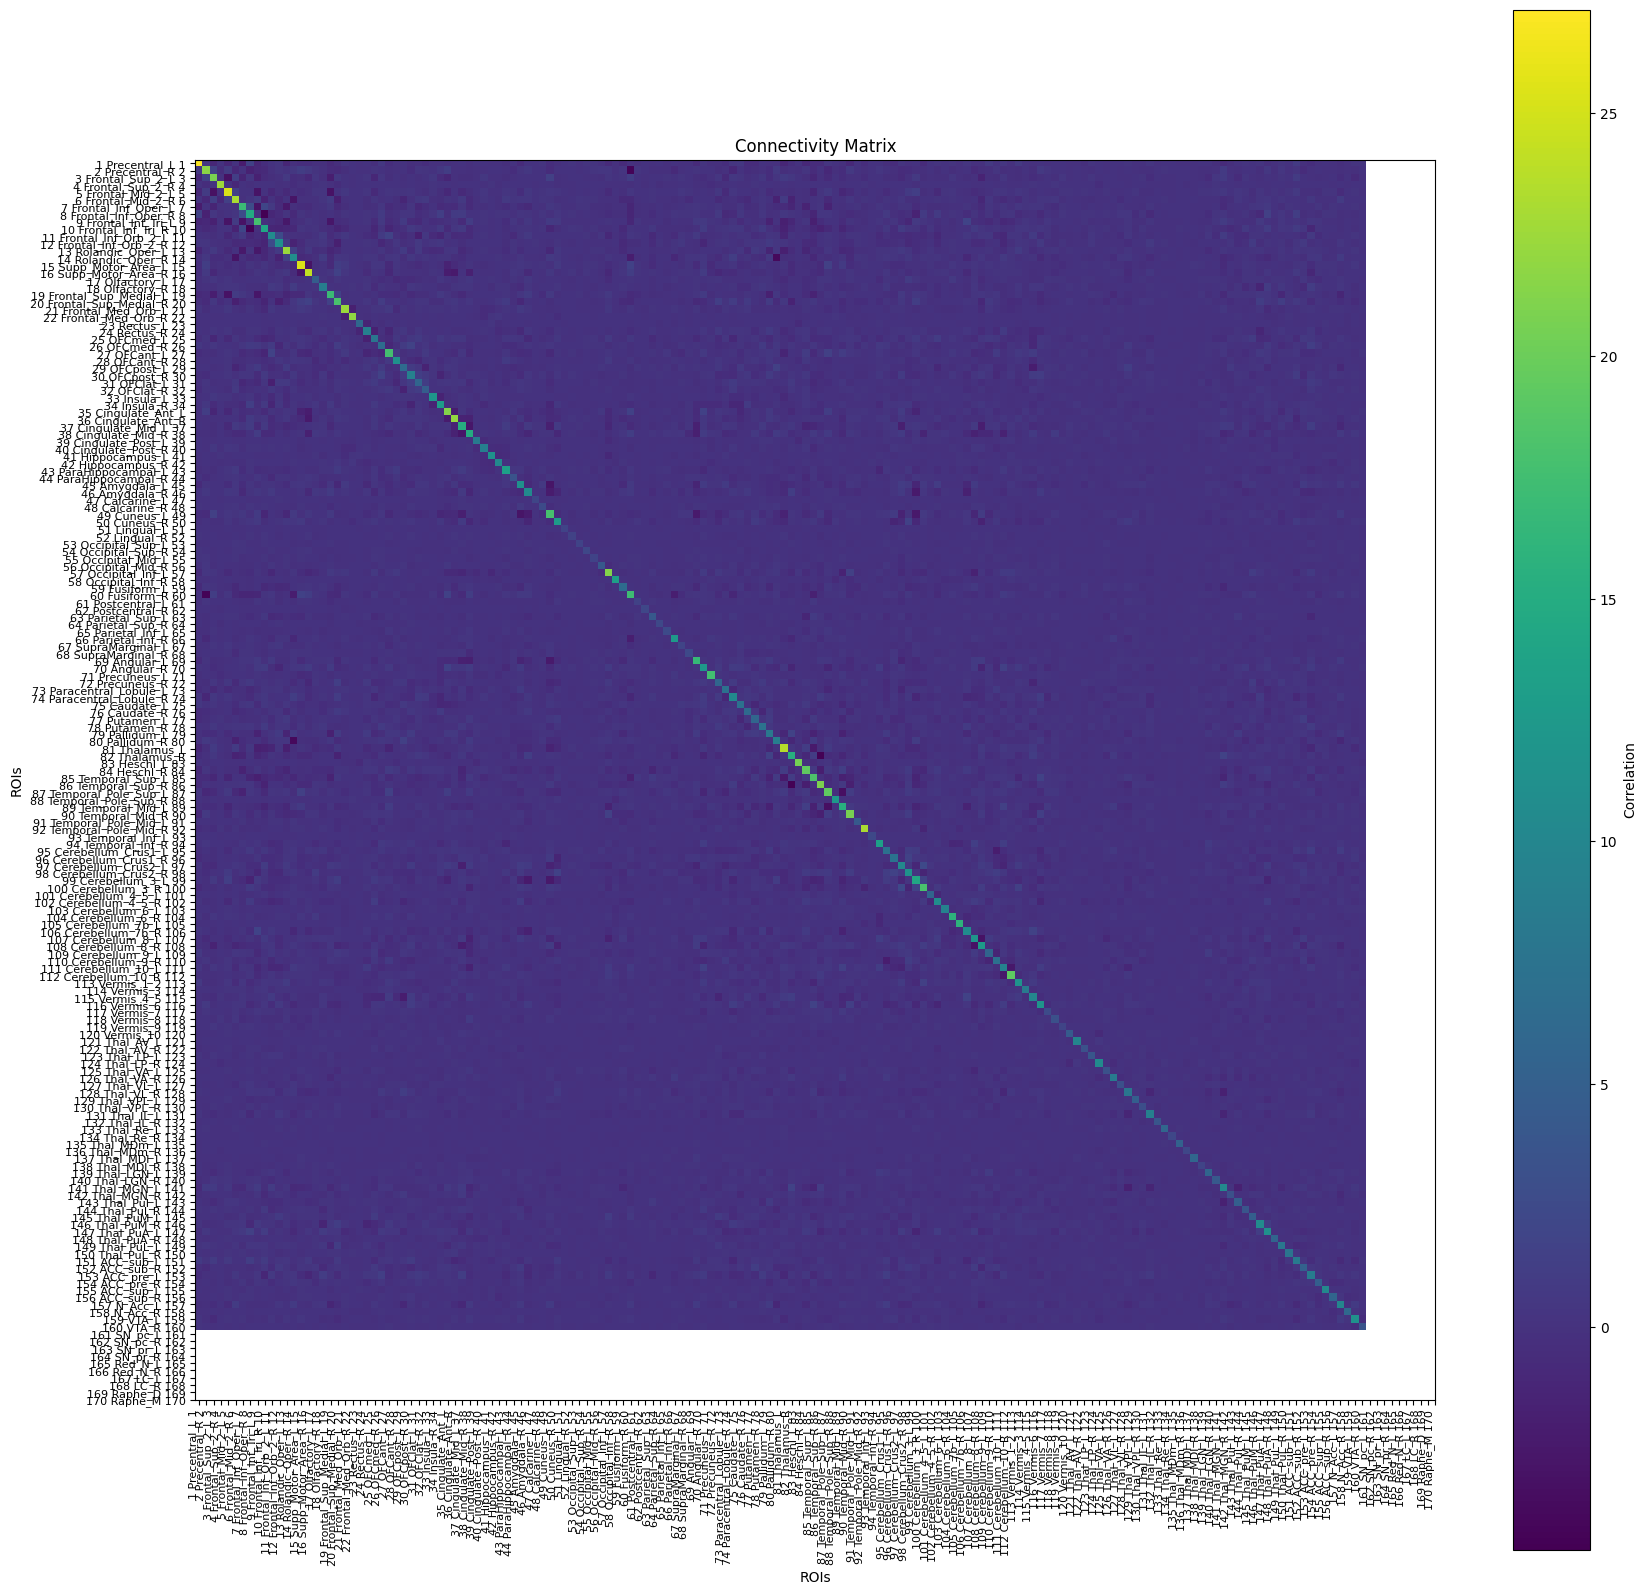

In [36]:
# Visualize K



# Adjust the figure size to fit all labels
plt.figure(figsize=(20, 20))

plt.imshow(K_, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.title('Connectivity Matrix')

plt.xticks(ticks=np.arange(len(roi_names)), labels=roi_names, rotation=90, ha='right', fontsize=8)
plt.yticks(ticks=np.arange(len(roi_names)), labels=roi_names, fontsize=8)

plt.xlabel('ROIs')
plt.ylabel('ROIs')
plt.show()


In [28]:
# filtering out the smaller elements

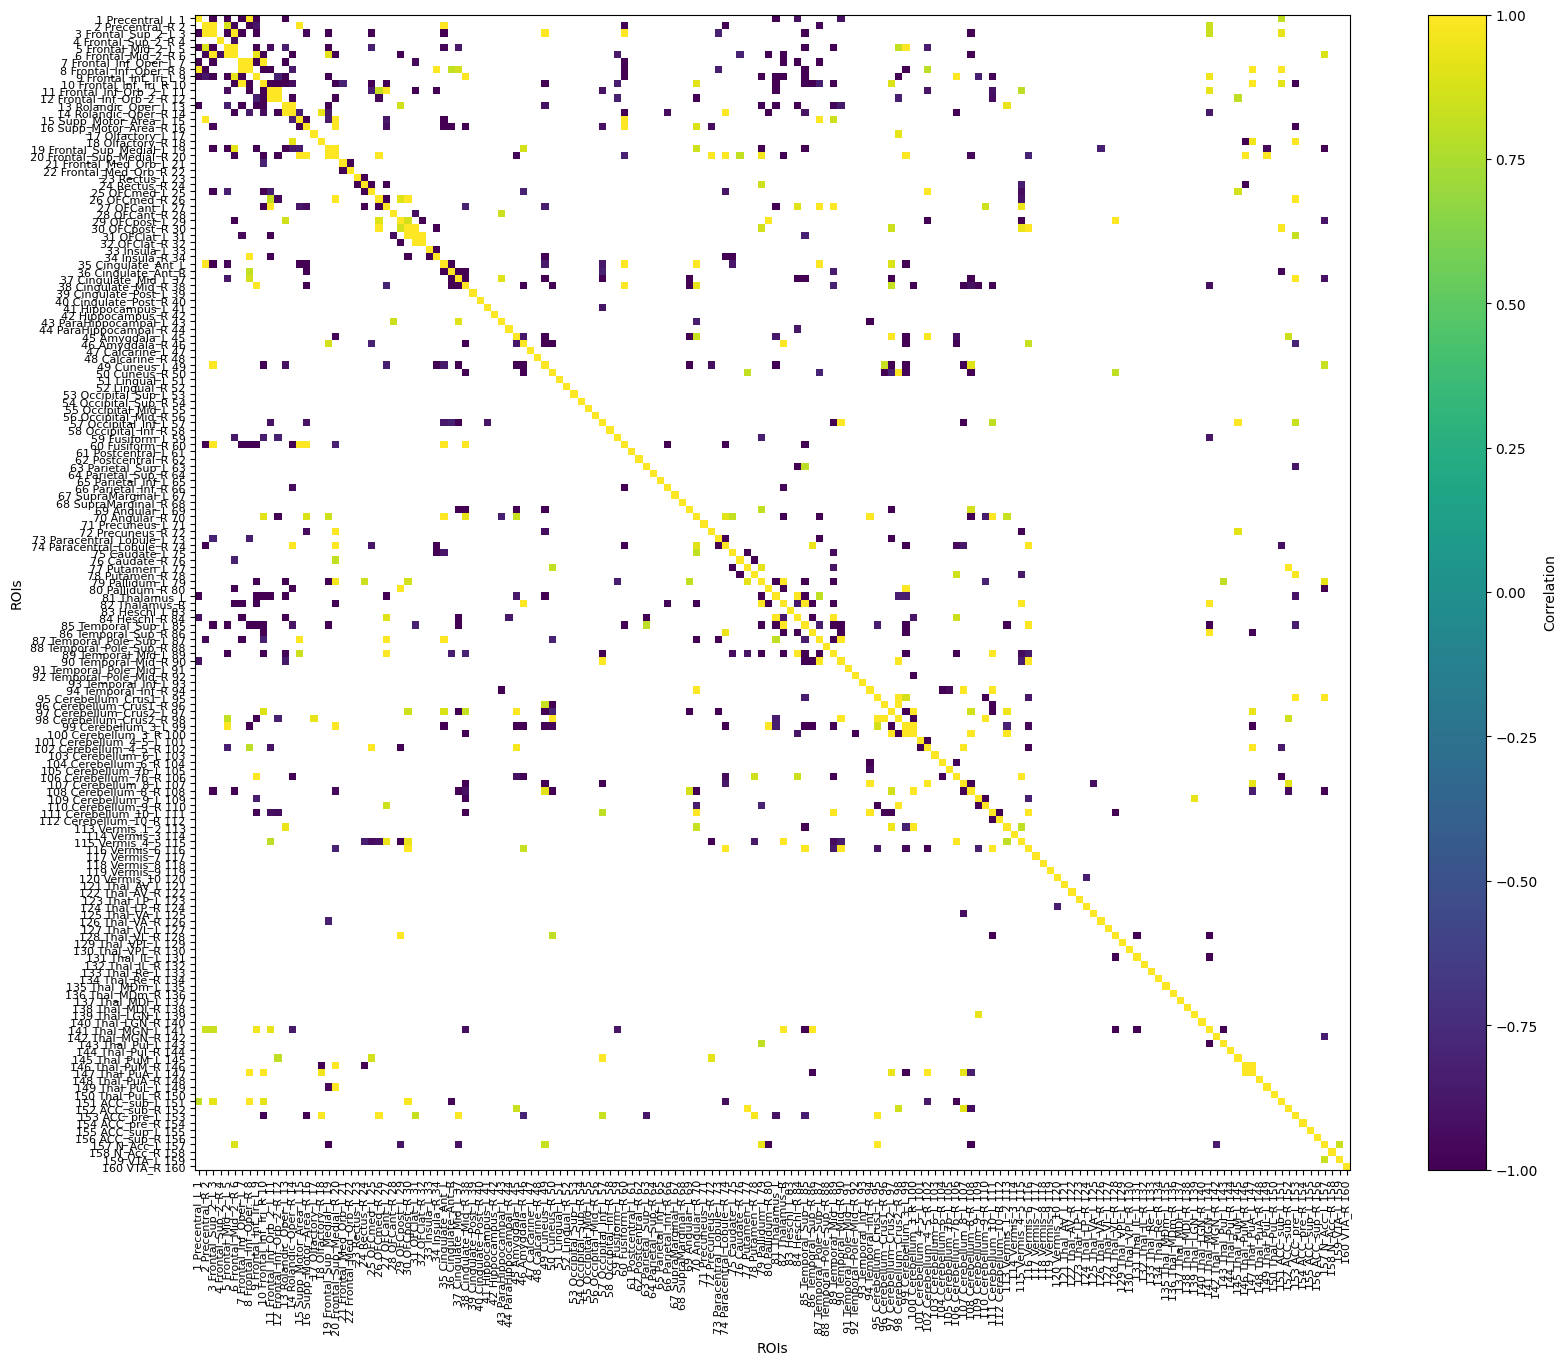

In [37]:
# Set the threshold
#threshold = 12
threshold = 0.8

# Create a boolean mask for the condition
mask = np.abs(K_) >= threshold  # True where absolute value is >= threshold

# Approach 2: Create a new matrix with only the elements >= 3, others as NaN (optional)
filtered_matrix = np.where(mask, K_, np.nan)  # Or use another value like 0

# Display the filtered matrices


# Adjust the figure size to fit all labels
plt.figure(figsize=(20, 15))

vmin, vmax = -1, 1  # Adjust these values as needed for your data
plt.imshow(filtered_matrix, cmap='viridis', interpolation='nearest', vmin=vmin, vmax=vmax)
plt.colorbar(label='Correlation')

#plt.xticks(ticks=np.arange(len(roi_names)), labels=roi_names, rotation=90, ha='right', fontsize=8)
#plt.yticks(ticks=np.arange(len(roi_names)), labels=roi_names, fontsize=8)

plt.xticks(ticks=np.arange(len(filtered_indices)), labels=[roi_names[i] for i in filtered_indices], rotation=90, fontsize=8)
plt.yticks(ticks=np.arange(len(filtered_indices)), labels=[roi_names[i] for i in filtered_indices], fontsize=8)

plt.xlabel('ROIs')
plt.ylabel('ROIs')
#plt.savefig('K_AAL3_filtered_PPMI_case_B.png', dpi=300)
#plt.savefig('K_AAL3_filtered_PPMI_case_B.svg', format='svg')
plt.savefig('K_AAL3_filtered_PPMI_case_B.pdf')



#plt.savefig('K_AAL3_filtered_PPMI_case_B_other_product.svg', format='svg')
#plt.savefig('K_AAL3_filtered_PPMI_case_B_other_product.pdf')
#plt.savefig('K_AAL3_filtered_PPMI_case_B_other_product.png', dpi=300)

plt.show()


Eigenvalues:
[28.93270729 28.65238903 28.46379365 27.20915697 26.7392413  26.19470495
 25.86895066 25.7902097  25.45225063 25.13948984 24.86892293 24.38336553
 24.11453721 23.87149712 23.47558422 23.69183608 22.64433157 22.5467579
 22.34934682 21.96800991 21.88147174 21.1619883  21.10585782 20.84499979
 20.68714249 20.23145825 19.57517823 19.9647681  19.4071016  19.17775735
 18.65562587 18.48582756 16.78536168 17.23624464 17.53479202 17.75715369
 17.7183555  16.18367416 15.88839953 15.71942708 15.7992035  15.12524053
 15.34974741 13.97882196 13.96570003 13.89749616 13.76915749 13.4841442
 13.33866148 13.1249237  13.00446948 12.58713345 12.26618176 12.16863873
 12.01760234 11.80667035 11.93434942 11.70566817 11.46435996 11.57634346
 11.23395978 11.08116697 10.93728012 10.75821738 10.50021701 10.35383689
 10.13662431  8.74225374  9.8240402   9.72706283  9.74774439  8.99567742
  8.92681408  9.39858932  9.30517942  9.34106838  8.5376643   8.45550422
  8.18432775  7.56598477  7.99883882  7.

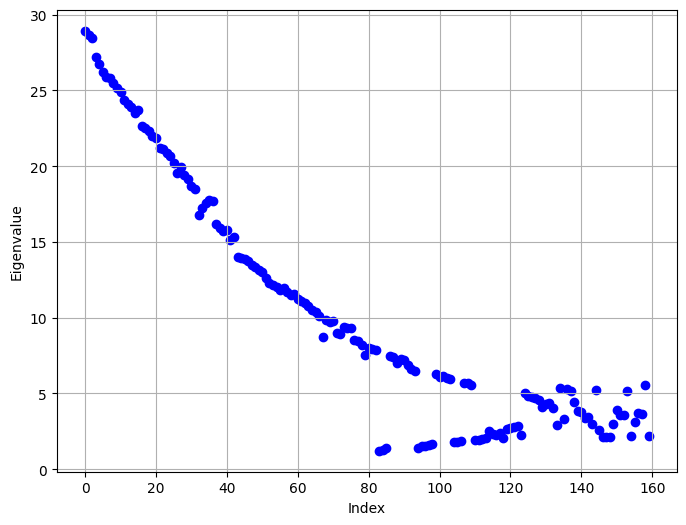

In [38]:
w, v = np.linalg.eig(K_)

print("Eigenvalues:")
print(w)

print("\nEigenvectors:")
print(v)

# Plot eigenvalues
plt.figure(figsize=(8, 6))
plt.scatter(np.arange(len(w)), w, color='b', label='Eigenvalues')
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
#plt.title('Eigenvalues of Matrix A')
plt.grid(True)
#plt.savefig('eigenvalues@PD_case_B.pdf')
plt.savefig('eigenvaluesPD_case_B.pdf')
plt.show()


In [26]:
# major effects: occipital and the other areas; hippocampus and cerebellum; temporal and cerebellum; cerebellum and vermis



/Users/mariamannone/test2/lib/python3.10/site-packages/nilearn/maskers/nifti_labels_masker.py:805: UserWarning: After resampling the label image to the data image, the following labels were removed: {168, 134, 167}. Label image only contains 164 labels (including background).
  warnings.warn(


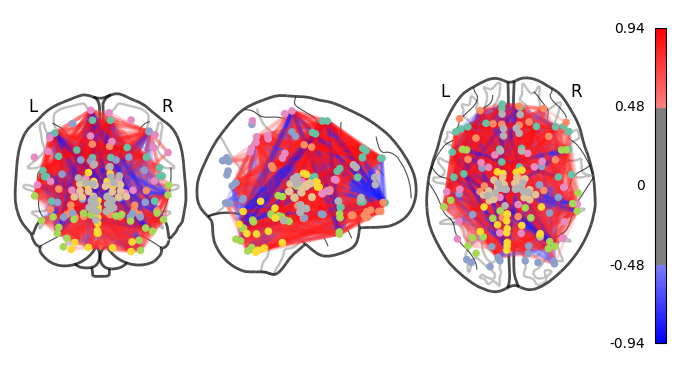

In [27]:
#

# June 5: print the connectome with the AAL3 atlas

#

from nilearn import input_data, plotting, connectome
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

# Define the path to the NIfTI file and AAL3 atlas
nifti_file = "/Users/mariamannone/Desktop/new_phd_/DICOM_aal3_p3/output.nii.gz/5_rsfmri_rl.nii.gz"
aal3_atlas_filename = '/Users/mariamannone/Downloads/AAL3/AAL3v1.nii.gz'
aal3_labels_filename = '/Users/mariamannone/Downloads/AAL3/AAL3v1.nii.txt'

# Load the AAL3 atlas image
atlas_img = nib.load(aal3_atlas_filename)

# Create a masker using the AAL3 atlas
masker = input_data.NiftiLabelsMasker(labels_img=atlas_img, standardize=True, memory='nilearn_cache')
time_series = masker.fit_transform(nifti_file)

# Identify non-empty ROIs (ROIs with non-zero time series)
non_empty_rois = np.any(time_series, axis=0)
non_empty_indices = np.where(non_empty_rois)[0]

# Filter the time series to include only non-empty ROIs
filtered_time_series = time_series[:, non_empty_indices]

# Compute the connectivity matrix
correlation_measure = connectome.ConnectivityMeasure(kind='correlation')
connectivity_matrix = correlation_measure.fit_transform([filtered_time_series])[0]

# Load the AAL3 labels
with open(aal3_labels_filename, 'r') as f:
    labels = f.read().splitlines()

# Obtain the coordinates of the ROIs from the atlas
coords = plotting.find_parcellation_cut_coords(labels_img=atlas_img)

# Filter coordinates to include only those for non-empty ROIs
filtered_coords = [coords[i] for i in non_empty_indices]

# Plot the connectome
edge_properties = {
    'alpha': 0.3 # 0 is completely transparent, 1 is opaque
}

node_size = 20  # Adjust this value to change node size


plotting.plot_connectome(connectivity_matrix, filtered_coords, edge_threshold="80%", edge_kwargs=edge_properties, node_size = node_size, colorbar=True)

# Save the plot
plt.savefig('baseline_connectome.png', dpi=300)
plotting.show()


/Users/mariamannone/test2/lib/python3.10/site-packages/nilearn/maskers/nifti_labels_masker.py:805: UserWarning: After resampling the label image to the data image, the following labels were removed: {64, 133, 134, 73, 74, 63}. Label image only contains 161 labels (including background).
  warnings.warn(


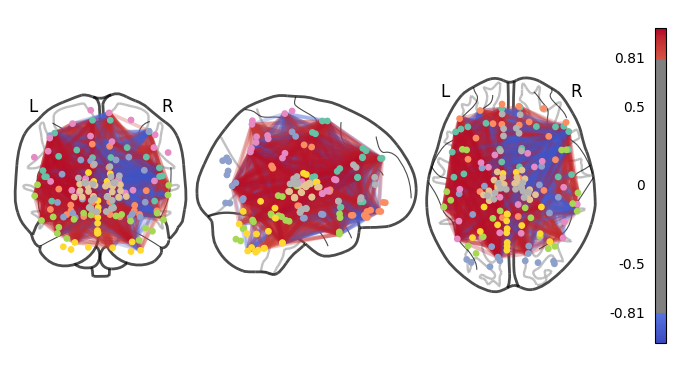

In [28]:
from nilearn import input_data, plotting, connectome
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Define the path to the NIfTI file and AAL3 atlas
nifti_file = "/Users/mariamannone/Desktop/new_phd_/DICOM_aal3_p4/output.nii.gz/5_rsfmri_rl.nii.gz"
aal3_atlas_filename = '/Users/mariamannone/Downloads/AAL3/AAL3v1.nii.gz'
aal3_labels_filename = '/Users/mariamannone/Downloads/AAL3/AAL3v1.nii.txt'

# Load the AAL3 atlas image
atlas_img = nib.load(aal3_atlas_filename)

# Create a masker using the AAL3 atlas
masker = input_data.NiftiLabelsMasker(labels_img=atlas_img, standardize=True, memory='nilearn_cache')
time_series = masker.fit_transform(nifti_file)

# Identify non-empty ROIs (ROIs with non-zero time series)
non_empty_rois = np.any(time_series, axis=0)
non_empty_indices = np.where(non_empty_rois)[0]

# Filter the time series to include only non-empty ROIs
filtered_time_series = time_series[:, non_empty_indices]

# Compute the connectivity matrix
correlation_measure = connectome.ConnectivityMeasure(kind='correlation')
connectivity_matrix = correlation_measure.fit_transform([filtered_time_series])[0]

# Load the AAL3 labels
with open(aal3_labels_filename, 'r') as f:
    labels = f.read().splitlines()

# Obtain the coordinates of the ROIs from the atlas
coords = plotting.find_parcellation_cut_coords(labels_img=atlas_img)

# Filter coordinates to include only those for non-empty ROIs
filtered_coords = np.array([coords[i] for i in non_empty_indices])

# Define edge properties with transparency for edges
#edge_kwargs = {'alpha': 0.02}

# Plot the connectome
edge_properties = {
    'alpha': 0.3 # 0 is completely transparent, 1 is opaque
}


# Plot the connectome with an edge threshold of the top 80% strongest edges
# and set edge_vmin and edge_vmax directly
node_size = 15  # Adjust this value to change node size

plotting.plot_connectome(
    connectivity_matrix,
    filtered_coords,
    edge_threshold="80%",
    edge_cmap='coolwarm',  # Use a colormap for edges
    edge_vmin=-1,  # Set the minimum edge value for colormap scaling
    edge_vmax=1,  # Set the maximum edge value for colormap scaling
    edge_kwargs=edge_properties,
    colorbar=True,
    node_size=node_size
)

# Save the plot
plt.savefig('baseline_connectome.png', dpi=300)
plt.show()


/Users/mariamannone/test2/lib/python3.10/site-packages/nilearn/maskers/nifti_labels_masker.py:805: UserWarning: After resampling the label image to the data image, the following labels were removed: {168, 170, 134, 167}. Label image only contains 163 labels (including background).
  warnings.warn(


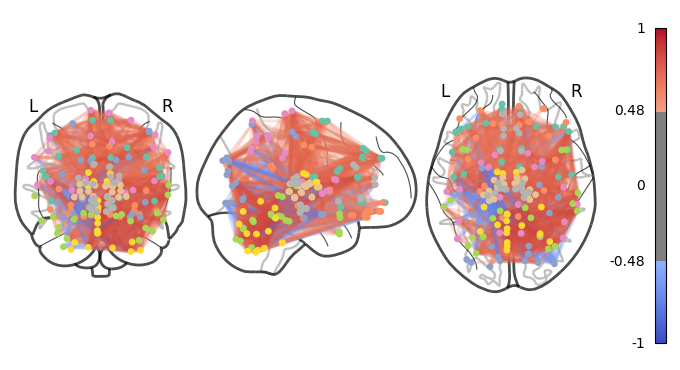

In [29]:
# follow-up

from nilearn import input_data, plotting, connectome
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Define the path to the NIfTI file and AAL3 atlas
nifti_file_fu = "/Users/mariamannone/Desktop/new_phd_/DICOM_bc/output.nii.gz/801_resting_state_fmri.nii.gz"

aal3_atlas_filename = '/Users/mariamannone/Downloads/AAL3/AAL3v1.nii.gz'
aal3_labels_filename = '/Users/mariamannone/Downloads/AAL3/AAL3v1.nii.txt'

# Load the AAL3 atlas image
atlas_img = nib.load(aal3_atlas_filename)

# Create a masker using the AAL3 atlas
masker = input_data.NiftiLabelsMasker(labels_img=atlas_img, standardize=True, memory='nilearn_cache')
time_series_fu = masker.fit_transform(nifti_file_fu)

# Identify non-empty ROIs (ROIs with non-zero time series)
non_empty_rois_fu = np.any(time_series_fu, axis=0)
non_empty_indices_fu = np.where(non_empty_rois_fu)[0]

# Filter the time series to include only non-empty ROIs
filtered_time_series_fu = time_series_fu[:, non_empty_indices_fu]

# Compute the connectivity matrix
correlation_measure_fu = connectome.ConnectivityMeasure(kind='correlation')
connectivity_matrix_fu = correlation_measure.fit_transform([filtered_time_series_fu])[0]

# Load the AAL3 labels
with open(aal3_labels_filename, 'r') as f:
    labels = f.read().splitlines()

# Obtain the coordinates of the ROIs from the atlas
coords = plotting.find_parcellation_cut_coords(labels_img=atlas_img)

# Filter coordinates to include only those for non-empty ROIs
filtered_coords_fu = np.array([coords[i] for i in non_empty_indices_fu])

# Define edge properties with transparency for edges
#edge_kwargs = {'alpha': 0.02}

# Plot the connectome
edge_properties = {
    'alpha': 0.3 # 0 is completely transparent, 1 is opaque
}


# Plot the connectome with an edge threshold of the top 80% strongest edges
# and set edge_vmin and edge_vmax directly
node_size = 15  # Adjust this value to change node size

plotting.plot_connectome(
    connectivity_matrix_fu,
    filtered_coords_fu,
    edge_threshold="80%",
    edge_cmap='coolwarm',  # Use a colormap for edges
    edge_vmin=-1,  # Set the minimum edge value for colormap scaling
    edge_vmax=1,  # Set the maximum edge value for colormap scaling
    edge_kwargs=edge_properties,
    colorbar=True,
    node_size=node_size
)

# Save the plot
plt.savefig('baseline_connectome_FU.png', dpi=300)
plt.show()


In [ ]:
# July 17, test on network measures

In [53]:
# connectivity_matrix
# connectivity_matrix_fu

#female_PD_BL

#female_PD_FU

import networkx as nx

graph1 = nx.from_numpy_array(connectivity_matrix)
graph2 = nx.from_numpy_array(connectivity_matrix_fu)


# Calculate global network metrics
average_shortest_path_length1 = nx.average_shortest_path_length(graph1)
global_efficiency1 = nx.global_efficiency(graph1)

# Calculate local network metrics
degree_centrality1 = nx.degree_centrality(graph1)
clustering_coefficient1 = nx.clustering(graph1)
local_efficiency1 = nx.local_efficiency(graph1)

print("Average Shortest Path Length, baseline:", average_shortest_path_length1)
print("Global Efficiency, baseline:", global_efficiency1)
#print("Degree Centrality, baseline:", degree_centrality1)
#print("Clustering Coefficient, baseline:", clustering_coefficient1)
print("Local Efficiency, baseline:", local_efficiency1)




# Calculate global network metrics
average_shortest_path_length2 = nx.average_shortest_path_length(graph2)
global_efficiency2 = nx.global_efficiency(graph2)

# Calculate local network metrics
degree_centrality2 = nx.degree_centrality(graph2)
clustering_coefficient2 = nx.clustering(graph2)
local_efficiency2 = nx.local_efficiency(graph2)

print("Average Shortest Path Length, follow-up:", average_shortest_path_length2)
print("Global Efficiency, follow-up:", global_efficiency2)
#print("Degree Centrality, follow-up:", degree_centrality2)
#print("Clustering Coefficient, follow-up:", clustering_coefficient2)
print("Local Efficiency, follow-up:", local_efficiency2)


# Map local metrics to node colors
degree_centrality_values1 = np.array([degree_centrality1[node] for node in graph1.nodes])
clustering_coefficient_values1 = np.array([clustering_coefficient1[node] for node in graph1.nodes])


# Map local metrics to node colors
degree_centrality_values2 = np.array([degree_centrality2[node] for node in graph2.nodes])
clustering_coefficient_values2 = np.array([clustering_coefficient2[node] for node in graph2.nodes])

Average Shortest Path Length, baseline: 1.0
Global Efficiency, baseline: 1.0
Local Efficiency, baseline: 1.0
Average Shortest Path Length, follow-up: 1.0
Global Efficiency, follow-up: 1.0
Local Efficiency, follow-up: 1.0


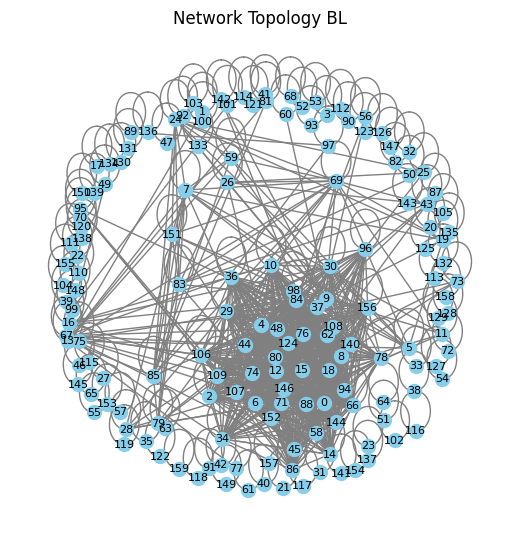

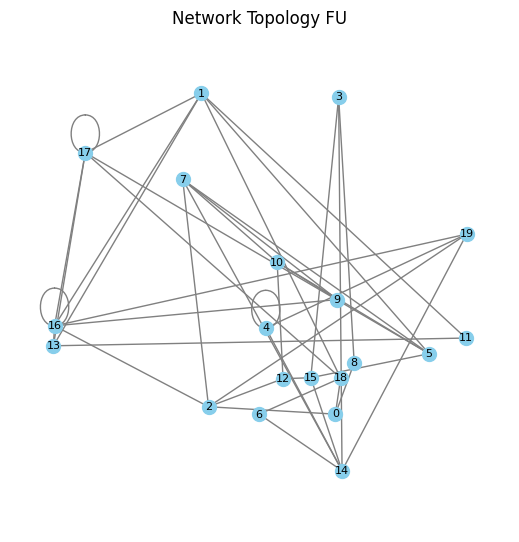

In [90]:
# Apply a threshold to create binary adjacency matrices
thresholdX = 0.9  # This can be adjusted based on your needs
binary_adjacency_bl = (connectivity_matrix > thresholdX).astype(int)
binary_adjacency_fu = (connectivity_matrix_fu > thresholdX).astype(int)

# Create graphs from the adjacency matrices
graph1 = nx.from_numpy_array(binary_adjacency_bl)
graph2 = nx.from_numpy_array(binary_adjacency_fu)

# Generate a fixed layout for the nodes
#fixed_pos = nx.spring_layout(graph1)  # Use a fixed seed for reproducibility
fixed_pos = nx.spring_layout(graph1, seed = 100, scale=10000, k=1.4)

# Draw the first network topology with the fixed positions
plt.figure(figsize=(5, 5))
nx.draw(graph1, fixed_pos, with_labels=True, node_size=100, node_color='skyblue', edge_color='gray', font_size=8)
plt.title('Network Topology BL')
plt.axis('equal')  # Ensure the aspect ratio is equal
plt.show()

# Draw the second network topology with the same fixed positions
plt.figure(figsize=(5, 5))
nx.draw(graph2, fixed_pos, with_labels=True, node_size=100, node_color='skyblue', edge_color='gray', font_size=8)
plt.title('Network Topology FU')
plt.axis('equal')  # Ensure the aspect ratio is equal
plt.show()